## Sampling and Quantization

#### The effect of quantizaiton and sampling

#### Generating a sine wave, $ sin(2\pi ft) $: This is our original signal x

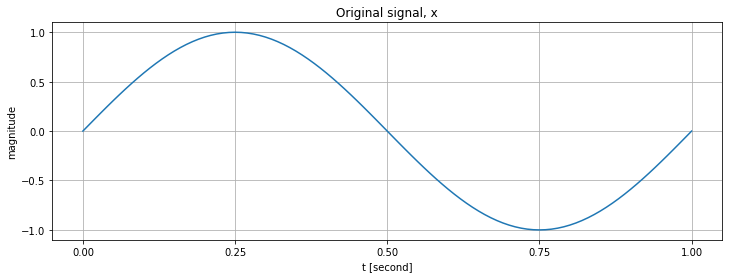

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Original signal
t = np.arange(0.0, 1.01, 0.01)
f = 1 # 1Hz
x = np.sin(2 * np.pi * f * t)

fig = plt.figure(figsize = (12, 4))
ax = fig.gca()

ax.set_xticks(np.arange(0, 1.1, 0.25))
ax.set_yticks(np.arange(-1.5, 1.5, 0.5))

plt.plot(t, x)
plt.xlabel('t [second]')
plt.ylabel('magnitude')
plt.title('Original signal, x')
plt.grid()
plt.ylim((-1.1,1.1))
plt.show()
# fig.savefig('orgSignal.png')
fig.savefig('orgSignal.png', dpi=300, transparent= True)

#### SAMPLING (with stem plot)
Let's sample the signal with sampling frequency <font color=red> $ f_s = 10 \ Hz $ </font> (from 0.0 to 1.0 second)
<br>
It obviously means that we will have a sample at every 0.1 second position from 0 seconde to 1.0 second [0, 1.0).


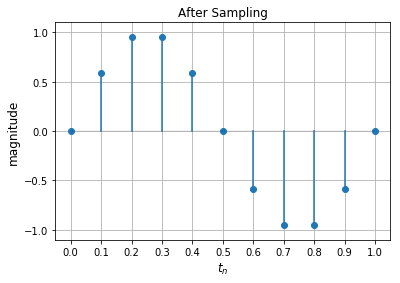

In [11]:
# sampling positions
tn = np.arange(0.0, 1.1, 0.1)   # sampling time
f = 1                           # sampling frequency
xs = np.sin(2 * np.pi * f * tn) # sampled signal


fig1 = plt.figure()
ax1 = fig1.gca()

ax1.set_xticks(tn)
ax1.set_yticks(np.arange(-1.5, 1.5, 0.5))

markerline, stemlines, baseline = plt.stem(tn, xs)
plt.setp(baseline, 'color', 'k', 'linewidth', 0.1)

plt.xlabel('$t_n$', fontsize = 12)
plt.ylabel('magnitude', fontsize = 12)
plt.title('After Sampling')
plt.grid()
plt.ylim((-1.1,1.1))

plt.show()

After sampling, the axis is supposed to show a sequence, not time. So, we have to change our axis like the below.
#### <font color=red> Note</font>
<div class="alert alert-block alert-info">
A discrete-time signal can be obtained by uniformly sampling a continuous-time signal at $t_n = n*T_S$, <br>
therefore, <br>
  
$ 
\begin{align}
x[n] &= x(t_n) \\ &= x(n*T_S) \\ &= x(\frac{n}{f_S})
\end{align}
$ <br> <br>
, where $T_s$: sampling period
</div>

#### Example: 
If $T_S$ = 0.1 then, <br>
$t_0 = 0 * 0.1 = 0 \\ t_1 = 1 * 0.1 = 0.1 \\ t_2 = 2 * 0.1 = 0.2 \\...$

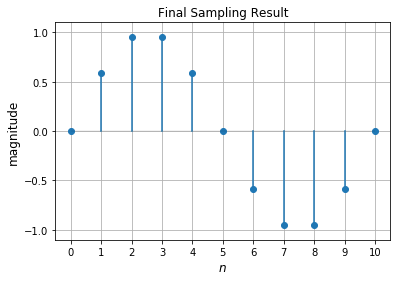

In [4]:
# sampling positions
fs = 10                            # sampling frequency
tn = np.arange(0.0, 1.1, 1/fs)     # sampling time
f = 1                              # signal frequency
xs = np.sin(2 * np.pi * f * tn)    # sampled signal

# Sample sequence
n = np.arange(0, len(tn))


fig1 = plt.figure()
ax1 = fig1.gca()

ax1.set_xticks(n)
ax1.set_yticks(np.arange(-1.5, 1.5, 0.5))

markerline, stemlines, baseline = plt.stem(n, xs)
plt.setp(baseline, 'color', 'k', 'linewidth', 0.1)

plt.xlabel('$n$', fontsize = 12)
plt.ylabel('magnitude', fontsize = 12)
plt.title('Final Sampling Result')
plt.grid()
plt.ylim((-1.1,1.1))
plt.show()

### Quantization

There are two types of quantizer, those are mid-tread quantizer and mid-riser quantizer
- __Mid-tread quantizers__ have a zero-valued reconstruction level (corresponding to a tread of a stairway) 
- __Mid-riser quantizers__ have a zero-valued classification threshold (corresponding to a riser of a stairway)

##### 1. Mid-tread quantizer

$ Q(x) = \Delta*floor(x/\Delta + 1/2) $ <br><br>

Sometimes, we separate quantization into two procedures: quantize/dequantize

__quantize__: $ x_q = floor(x/\Delta + 1/2) $ <br>
__dequantize__: $ Q(x) = \Delta * x_q $ <br>

where, <br>
$ x_q$: quantized coefficient,  <br>
$ Q(x)$: quantized signal x (or reconstruction level or reproduction level), <br> 
$\Delta$: quantization step size

Let's say $\Delta$ = 8, then

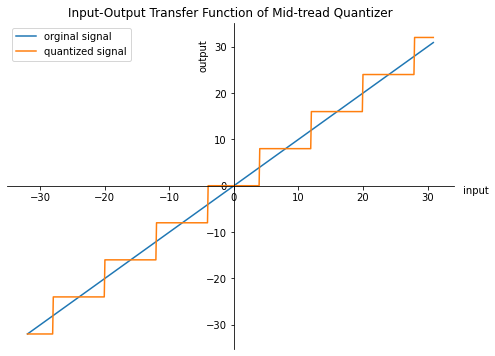

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x = np.arange(-32, 31, .1)
qStep = 8
xq = np.floor(abs(x)/qStep + 0.5)*qStep* np.sign(x)

ax.plot(x, x);
ax.plot(x, xq);
ax.legend(('orginal signal', 'quantized signal'));
plt.title('Input-Output Transfer Function of Mid-tread Quantizer')
plt.xlabel('input'); plt.ylabel('output')
ax.xaxis.set_label_coords(1.05, 0.5) # the range of graph is 0 to 1.0
ax.yaxis.set_label_coords(0.45, 0.9)


##### 2. Mid-rise quantizer

$ Q(x) = \Delta*(floor(x/\Delta) + 1/2) $ <br><br>
$ Q(x): quantized\ signal\ x$, <br> $\Delta: quantization\ step\ size $

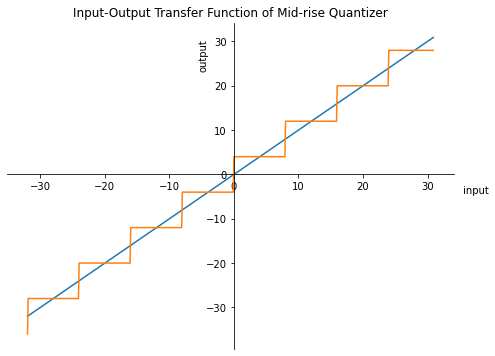

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def sign(x):
    return (x==0) + (x>0) + (x<0)*(-1)

fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x = np.arange(-32, 31, 0.1)
ax.plot(x, x);
qStep = 8
xq = (np.floor(abs(x)/qStep) + 0.5) * qStep * sign(x)
ax.plot(x, xq);
plt.title('Input-Output Transfer Function of Mid-rise Quantizer')
plt.xlabel('input'); plt.ylabel('output')
ax.xaxis.set_label_coords(1.05, 0.5) # the range of graph is 0 to 1.0
ax.yaxis.set_label_coords(0.45, 0.9)

Instead of the above `sign()` function, we can write a simple lambda function for the sign value of a sample.

In [22]:
import numpy as np

signL = lambda x: 1 if x>=0 else -1

x = 0
print(signL(x))
print(np.sign(x))

1
0


### Exercise
##### When signal y = x is given from 0 to 255 with 0.1 step size, draw 3 bit and 5 bit quantization results 
#### Condition: 
- Use subplot 1x2  
- Two lines for each subplot (one for y = x signal and the other for quantized signal)
- the 1st reproduction (=reconstruction) level = 0

##### Let's consider only 3-bit quantizer 

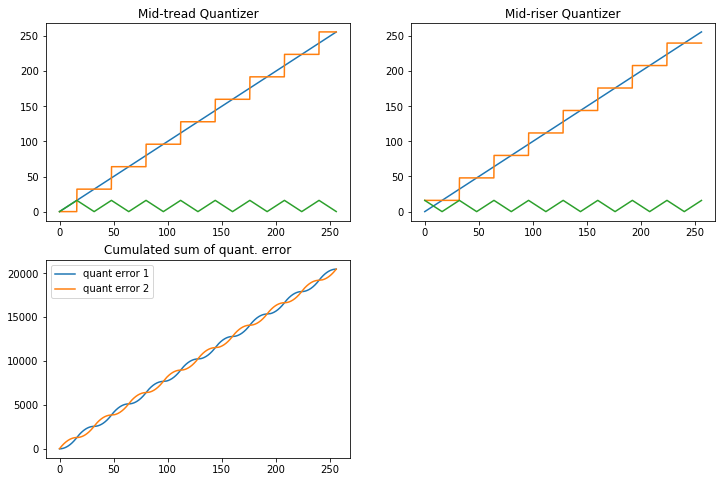

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 256, 0.1)

qStep1  = 256/8; qStep2 = 256/32 # 2**3 = 8 and 2**5 = 32


xQ1 = np.floor(x/qStep1 + 0.5)*qStep1
#xQ1 = (xQ1 == max(xQ1))*(256-qStep1)+ xQ1*(xQ1 < max(xQ1))

xQ2 = qStep1*(np.floor(x/qStep1) + 1/2)


fig = plt.figure(figsize=(12,8))

plt.subplot(221)
plt.plot(x, x)
plt.plot(x, xQ1)
plt.plot(x,abs(x-xQ1))
plt.title('Mid-tread Quantizer')

plt.subplot(222)
plt.plot(x, x)
plt.plot(x, xQ2)
plt.plot(x,abs(x-xQ2))
plt.title('Mid-riser Quantizer')

plt.subplot(223)
plt.plot(x, np.cumsum(abs(x-xQ1)), label='quant error 1')
plt.plot(x, np.cumsum(abs(x-xQ2)), label='quant error 2')
plt.legend()
plt.title('Cumulated sum of quant. error')

plt.show()


If we know the __dynamic range__ of signal, then we can calculate $\Delta$ by:<br><br>
$$ \Delta = \frac{(X_{max} - X_{min})} {2^n}, $$ <br>
where $n$: the number of bit, so $n$= 3 in case of 3 bit quantizer.

qStep1 =31.99, qStep2 =32.11
255.9


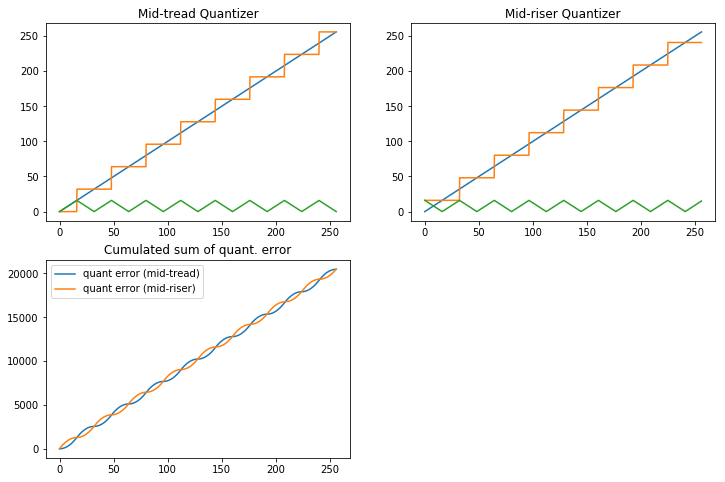

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# signal x
x = np.arange(0, 256, 0.1)

# mid-tread
numBit = 3
qStep1  = (max(x)-min(x))/(2**numBit)
xQ1 = np.floor(x/qStep1 + 1/2)*qStep1

# mid-riser
qStep2 = (max(x)+1)/2**numBit
xQ2 = qStep2*(np.floor(x/qStep2) + 1/2)

print('qStep1 ={:.2f}, qStep2 ={:.2f}'.format(qStep1, qStep2))
print(max(xQ1))

# plotting
fig = plt.figure(figsize=(12,8))

plt.subplot(221)
plt.plot(x, x)
plt.plot(x, xQ1)
plt.plot(x,abs(x-xQ1))
plt.title('Mid-tread Quantizer')

plt.subplot(222)
plt.plot(x, x)
plt.plot(x, xQ2)
plt.plot(x,abs(x-xQ2))
plt.title('Mid-riser Quantizer')

plt.subplot(223)
plt.plot(x, np.cumsum(abs(x-xQ1)), label='quant error (mid-tread)')
plt.plot(x, np.cumsum(abs(x-xQ2)), label='quant error (mid-riser)')
plt.legend()
plt.title('Cumulated sum of quant. error')

plt.show()